## Goal: Graph eq6 from JAP2014.

**The eq.6 in the paper had an errata. In this botebook you'll see the corrected version. Please revise the whole notebook carefuly and read the comments**

Use the following parameters:

R = 20 nm \
omega_0 = 18º \
z = 20 nm \
h = 150 nm 

For epsilon* use the HN function, with parameters: deps = 1.0, eps_i = 3.0, b = 0.5 , c = 1.0, tauHN = 1E-3 

Please graph separately the real and imaginary parts of the Complex Capacitance, in the frequency (f) range: 1 Hz to 100 kHz 

Then, graph "omega", following eq 7 in the manuscript, but only using this complex capacitance. I mean, omega = atan (c.imag/c.real)

## Real and imaginary parts of the apex complex capacitance of the AFM

The effective apex capacitance is represented by means of the following equation:

$$
C^{*}_{APEX}= 2 \pi \epsilon_{0} R \ln[1+ \frac{R(1-\sin{\theta_{0}})}{z+ \frac{h}{\epsilon^{*}}}]
$$

Let

$$
\epsilon_{0}= 8.85\text{·}10^{-12} \: \text{F·m}^{-1}
$$
$$
R=20 \: \text{nm}
$$
$$
\theta_{0}= 18^{\text{o}}
$$
$$
z=20 \: \text{nm}
$$
$$
h=150 \: \text{nm}
$$

In [2]:
#You only need to make the import one single time. No need to repeat for the rest of the Notebook
import matplotlib.pyplot as plt
import numpy as np
import cmath

In [3]:
#Declare the parameters in one box. They'll be usefull for the rest of the notebook

pi=np.pi
e0=8.85E-12
R=20E-9
theta0=18*pi/180
z=20E-9 #Notice the units!! They ALL should be in the international system. 
h=150E-9
tauHN=0.001
deps = 1.0
b = 0.5
c = 1.0
einf = 3.0
omega=np.logspace(1,5,50)*2*pi #I changed this but yours was also OK. 

In [4]:
#Define the epsilon* 

estar = einf + deps*(1+(1j*omega*tauHN)**(b))**(-c)

In [5]:
#Calculate the Capacitance 
capac=2*pi*e0*R*np.log(1+ R*(1-np.sin(theta0))/(z+ (h/estar)))

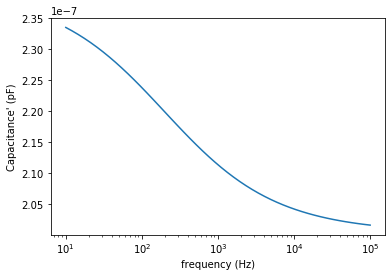

In [6]:
#Plot the real part of C*

fig, ax = plt.subplots()
ax.semilogx(omega/(2*pi),capac.real/1E-12) #Notice that I divided the values by 1E-12 to convert them to picoFarads and that I'm plotting against frequency and not omega!
plt.xlabel('frequency (Hz)')
plt.ylabel('Capacitance\' (pF)')
plt.show()

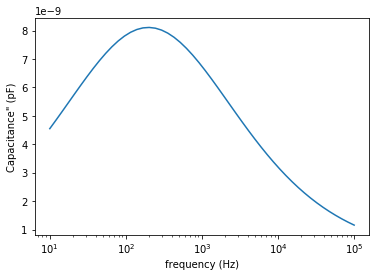

In [7]:
#Plot the imaginary part of C*

fig, ax = plt.subplots()
ax.semilogx(omega/(2*pi),-capac.imag/1E-12)
plt.xlabel('frequency (Hz)')
plt.ylabel('Capacitance\" (pF)')
plt.show()

## The phase of the Complex Capacitance

The phase of the AFM complex capacitance is given by the following equation:

$$
\theta = \tan^{-1}[\frac{\Im(C^{*}_{\text{APEX}})}{\Re(C^{*}_{\text{APEX}})}]
$$

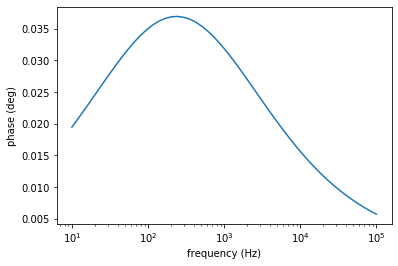

In [8]:
#Plot the imaginary part of C*
fig, ax = plt.subplots()
ax.semilogx(omega/(2*pi),np.arctan(-capac.imag/capac.real))
plt.xlabel('frequency (Hz)')
plt.ylabel('phase (deg)')
plt.show()